<a href="https://colab.research.google.com/github/pkanyu/datascience/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Steps in ML
# 1. Data Acquisition - Getting Data, CSV, database
# 2. Data Preparation - Cleaning
# 3. Modeling
# 4. Training
# 5. Testing***
# 6. Metrics/Performance
# 7. Feedback - It is ok, we retrain
# 8. Implementation.

# Step 1: Data Acquisition
import pandas
data = pandas.read_csv("https://modcom.co.ke/datasets/Customers.csv")
data

,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,"4547 Archer Common\nDiazchester, CA 06566-8576",Blue,31.926272,11.109461,37.268959,2.664034,392.204933
2,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...
495,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
# Check empties
# ML doesn't work with empties
# ML doesn't have letters, symbols
data.isnull().sum()

Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
data.shape

(500, 7)

In [ ]:
import pandas as pd

# Assuming you've loaded your data into a DataFrame named 'df'
# Drop 'Avatar' and 'Address' columns
# Check if columns exist before dropping
columns_to_drop = ['Avatar', 'Address']
for col in columns_to_drop:
    if col in data.columns:
        data = data.drop(columns=col)

# Display the updated DataFrame
print(data.head())

# # Display the updated DataFrame
# print(data.head())
data.shape


   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  


(500, 5)

In [ ]:
# 3a. Modeling/Algorithm
array =data.values
array
X = array[:,0:4] # TV, Radio, News Paper Columns. All Rows
Y = array[:,4]
# X are the features/inputs/Predictors
# Y is the target/output/predicted
X

array([[34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [33.71598092, 12.41880832, 35.77101619,  2.73515957]])

In [ ]:
# 3b Training Data and Testing Data
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.3, random_state = 42)
X_train

array([[33.87103788, 12.02692534, 37.08792607,  5.4935072 ],
       [33.9257949 , 12.01102188, 36.70105232,  2.75342417],
       [34.55576799, 12.17052542, 39.13109673,  3.66310549],
       ...,
       [31.81248256, 10.88692118, 34.89782769,  3.12863886],
       [32.25997327, 14.13289346, 37.02347924,  3.76207044],
       [32.42569728, 11.44890154, 37.58019043,  2.58696799]])

In [ ]:
# Cross Validation of Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))
models

for name,model in models:
  kfold = model_selection.KFold(n_splits =10,random_state=42,shuffle=True) # 10 Folds each fold will have 14
  cv_results= model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring="r2") # do severally
  print(name,cv_results.mean()) #Get mean since there were many folds

LR 0.9836511783019499
GBR 0.9534174329479624
RFR 0.9259604811714658
DTR 0.8351932444922248
SVR -0.027801619810937574
KNN 0.8808046213747683


In [ ]:
# 4. Training
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(X_train,Y_train) # 98%
print("Training...")
# We now have a knowledgeable Model


Training...


In [ ]:
# 4. Testing
from sklearn.metrics import r2_score
#n5 Testing, Hide_Y_test, Predict_X_test
predictions = model.predict(X_test)
print("Model Predicts Sales",predictions)
print("Y Test Sales", Y_test)
print("R Squared",r2_score(Y_test,predictions))

Model Predicts Sales [403.63035357 542.57356235 427.04008269 502.02467626 410.10188374
 569.90921263 531.94985563 506.28085039 408.70862395 473.95914658
 441.46777651 425.32203795 425.16025146 527.61684987 431.43833575
 424.09072091 575.77332672 484.91356248 458.35701207 481.95923783
 502.30706513 513.63519881 507.58273109 646.55027397 450.24996524
 496.29485514 556.36826583 554.96495812 399.63814263 325.86107649
 532.89922269 478.09811434 501.05639134 305.99004071 505.76262096
 483.81417428 518.85917527 438.19817337 456.69685196 471.03646117
 494.44933373 445.31075902 508.79663741 501.04267972 488.8052585
 535.39027551 595.14599044 514.03870978 280.7476436  433.08089011
 421.6873266  481.22728695 584.66849887 608.73407254 563.99385868
 494.75457979 394.53155065 456.41369099 573.10100035 499.6668291
 512.81853202 392.13333758 480.03165061 481.54168761 475.11216172
 546.27720212 430.8547356  602.14772816 422.3812221  493.56413482
 528.73904919 581.46440293 620.18410421 512.56502578 411.

In [ ]:
# 8. Implementation
# Can the untested model try to predict Amount Spent we can make?
amount_spent = [[34,12,39,4]]
output = model.predict(amount_spent)
print("You will spend",output,"Ksh")
# 0729225710
# Y = f(x) + e
# where Y is Sales
# where X is TV

You will spend [551.69807654] Ksh


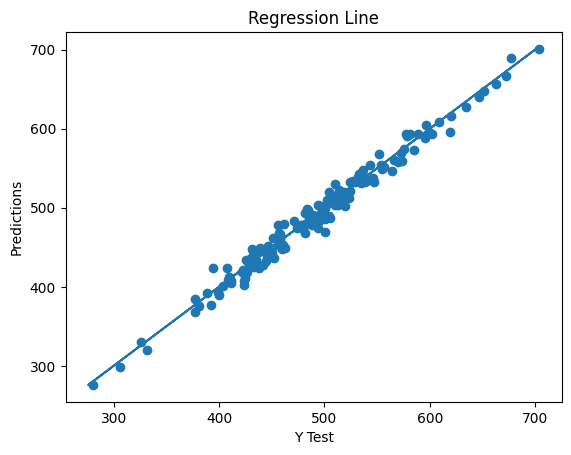

In [ ]:
# Plot Linear
import matplotlib.pyplot as plt
plt.scatter(predictions,Y_test)
plt.plot(Y_test,Y_test)
plt.title("Regression Line")
plt.ylabel("Predictions")
plt.xlabel("Y Test")
plt.show()